# Tarea 7. Estimación del riesgo sistemático ($\beta$).

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea aplicarás la técnica aprendida en clase para la estimación del coeficiente de riesgo sistemático $\beta$, el cual es primordial en el modelo de valoración de activos en equilibrio CAPM.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea7_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Selección de activos (10 puntos)

Seleccionar cinco (5) activos de su preferencia y enunciarlos en una celda en formato Markdown.

- Pfizer Inc. (PFE)
- AT&T (T)
- NVIDIA Corporation (NVDA)
- Amarin Corporation (AMRN)
- Occidental Petroleum Corporation (OXY)

## 2. Descarga de datos (10 puntos)

Descargar los precios mensuales ajustados en el cierre para el índice S&P 500 (^GSPC) y para los activos seleccionados en los últimos tres años.

1. Graficar los precios (5 puntos).
2. Graficar los rendimientos (5 puntos).

In [1]:
# Importar paqueterias
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None, freq='m'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval=freq).read()['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
#importar precios de activos 
names= ['PFE','T','NVDA','AMRN','OXY','^GSPC']
start, end= '2015-04-20','2020-04-20'
closes= get_adj_closes(tickers=names, 
                    start_date=start, 
                    end_date=end)

In [5]:
# Obtener precios mensuales
closes=get_adj_closes(tickers=names,start_date=start,end_date=end)

In [6]:
closes.head()

Symbols,PFE,T,NVDA,AMRN,OXY,^GSPC
Date,,,,,,
2015-05-01,28.982380,26.234520,21.404249,2.31,60.263245,2107.389893
2015-06-01,28.196251,26.978874,19.540529,2.46,59.939552,2063.110107
2015-07-01,30.323799,26.386435,19.385059,2.26,54.624004,2103.840088
2015-08-01,27.969206,25.737200,21.843416,2.21,56.810524,1972.180054
2015-09-01,26.619904,25.075296,24.052742,1.93,51.472626,1920.030029


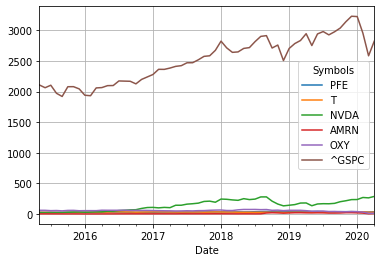

In [7]:
# Graficar los precios 
closes.plot(grid=True)

In [8]:
# Obtenemos rendimientos 
ret= closes.pct_change()
ret.head()

Symbols,PFE,T,NVDA,AMRN,OXY,^GSPC
Date,,,,,,
2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,-0.027124,0.028373,-0.087072,0.064935,-0.005371,-0.021012
2015-07-01,0.075455,-0.021959,-0.007956,-0.081301,-0.088682,0.019742
2015-08-01,-0.077648,-0.024605,0.126817,-0.022124,0.040029,-0.062581
2015-09-01,-0.048242,-0.025718,0.101144,-0.126697,-0.093960,-0.026443


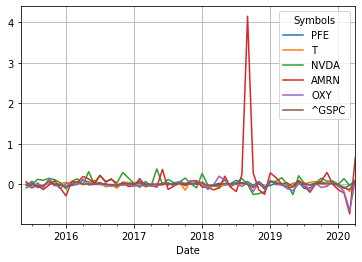

In [9]:
ret.plot(grid=True)

## 3. Calculando los coeficientes $\beta$ (50 puntos)

Usando los datos de rendimientos mensuales calculados en el punto anterior:

1. Estime el valor del coeficiente de riesgo sistemático $\beta$ para cada uno de los activos seleccionados, con el método visto en clase (5 puntos por cada activo).
2. Compare su estimación de $\beta$ con el valor reportado en Yahoo! Finance mediante el error relativo: 
$$e_{relativo}=\frac{\beta_{estimado}-\beta_{Yahoo!}}{\beta_{Yahoo!}}.$$
Concluya de acuerdo al valor del error relativo obtenido (5 puntos por cada activo).

In [10]:
# Obtener matriz de covarianza
cov= ret.cov()
cov

Symbols,PFE,T,NVDA,AMRN,OXY,^GSPC
Symbols,,,,,,
PFE,0.002512,0.000839,0.000185,0.008246,0.001700,0.001060
T,0.000839,0.002974,0.001035,0.007288,0.002858,0.001187
NVDA,0.000185,0.001035,0.015829,0.000618,0.002552,0.002348
AMRN,0.008246,0.007288,0.000618,0.326323,0.015009,0.004405
OXY,0.001700,0.002858,0.002552,0.015009,0.012839,0.002998
^GSPC,0.001060,0.001187,0.002348,0.004405,0.002998,0.001715


In [11]:
#betas
beta_amrn=cov.loc['AMRN', '^GSPC']/cov.loc['^GSPC','^GSPC']
beta_t=cov.loc['T', '^GSPC']/cov.loc['^GSPC','^GSPC']
beta_nvda=cov.loc['NVDA', '^GSPC']/cov.loc['^GSPC','^GSPC']
beta_oxy=cov.loc['OXY', '^GSPC']/cov.loc['^GSPC','^GSPC']
beta_pfe=cov.loc['PFE', '^GSPC']/cov.loc['^GSPC','^GSPC']
beta_amrn,beta_t,beta_nvda,beta_oxy,beta_pfe

(2.568098424846675,
 0.6921697545053,
 1.368766560417858,
 1.7475445341165587,
 0.617970969807124)

In [12]:
#betas yahoo
by_amrn= 2.19
by_t=0.72
by_nvda=1.47
by_oxy=1.75
by_pfe=0.60

In [13]:
# error relativo 
e_amrn= (beta_amrn-by_amrn)/by_amrn
e_t= (beta_t-by_t)/by_t
e_nvda=(beta_nvda-by_nvda)/by_nvda
e_oxy=(beta_oxy-by_oxy)/by_oxy
e_pfe=(beta_pfe-by_pfe)/by_pfe
e_pfe,e_t,e_nvda,e_amrn,e_oxy

(0.029951616345206638,
 -0.038653118742638784,
 -0.06886628543002853,
 0.17264768257839053,
 -0.0014031233619664313)

**Conclusiones**

- **Pfizer Inc. (PFE):** nuestro error es parecido, pero si tiene una variación significativa, que debe de ser analizada
- **AT&T (T):** es muy cercano a cero, lo que nos indica que es significativo el cálculo que nosotros realizamos al del mercado.
- **NVIDIA Corporation (NVDA):** Es un error relativo muy considerable al igual que la compañía anterior, muy parecido al del mercado.
- **Amarin Corporation (AMRN):** el error de esta corporación es el mayor de las empresas que tomé.
- **Occidental Petroleum Corporation (OXY):** Este error es muy cercano al cero, representa que la beta calculada es prácticamente igual a la mostrada en la página de referencia.

## 4. Gráfico y conclusiones (30 puntos)

1. Grafique cada uno de los activos en el espacio de $E[r]$ (eje $y$) vs. $\beta$ (eje $x$) (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. De la ecuación obtenida, identifique el valor de la tasa libre de riesgo $r_f$, y el valor del rendimiento esperado del portafolio de mercado $E[r_M]$. Compare este último con el rendimiento esperado del índice S&P500 (10 puntos).

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Rendimientos y volatilidad mensuales & betas
data= pd.DataFrame(data={'Mean':ret.mean(),
                        'Volatility':ret.std()},
                         index= ret.columns)
data['beta']=[beta_amrn,beta_nvda,beta_oxy,beta_pfe,beta_t,'NaN']
data

,Mean,Volatility,beta
Symbols,,,
PFE,0.004950,0.050123,2.5681
T,0.004033,0.054537,1.36877
NVDA,0.052602,0.125812,1.74754
AMRN,0.082236,0.571247,0.617971
OXY,-0.016890,0.113308,0.69217
^GSPC,0.005827,0.041418,NaN


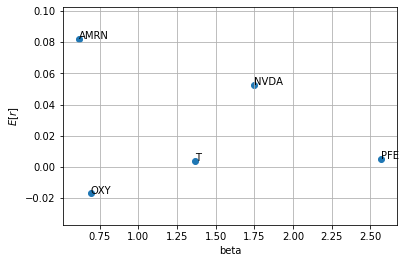

In [19]:
# Gráfica rendimiento vs. betas
plt.scatter(data.beta, data.Mean)

plt.text(data.loc['AMRN','beta'],
        data.loc['AMRN','Mean'],
        'AMRN')
plt.text(data.loc['NVDA','beta'],
        data.loc['NVDA','Mean'],
        'NVDA')
plt.text(data.loc['OXY','beta'],
        data.loc['OXY','Mean'],
        'OXY')
plt.text(data.loc['PFE','beta'],
        data.loc['PFE','Mean'],
        'PFE')
plt.text(data.loc['T','beta'],
        data.loc['T','Mean'],
        'T')

plt.ylabel('$E[r]$')
plt.xlabel('beta')
plt.grid()
plt.show()

In [20]:
datab= data[:5]
datab

,Mean,Volatility,beta
Symbols,,,
PFE,0.004950,0.050123,2.5681
T,0.004033,0.054537,1.36877
NVDA,0.052602,0.125812,1.74754
AMRN,0.082236,0.571247,0.617971
OXY,-0.016890,0.113308,0.69217


In [21]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
#ajustamos 
dataX= datab[['beta']]
Er= np.array(dataX)
beta= datab['Mean'].values
regr = linear_model.LinearRegression()

In [23]:
#Entrenamos los datos 
regr.fit(Er, beta)
#predecimos Y
beta_pred = regr.predict(Er)

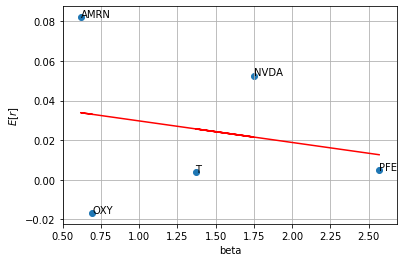

In [25]:
X= np.linspace(0,3)
plt.plot(Er,beta_pred, 'r')
plt.scatter(datab.beta, datab.Mean)
plt.ylabel('$E[r]$')
plt.xlabel('beta')

plt.text(datab.loc['AMRN','beta'],
        datab.loc['AMRN','Mean'],
        'AMRN')
plt.text(datab.loc['NVDA','beta'],
        datab.loc['NVDA','Mean'],
        'NVDA')
plt.text(datab.loc['OXY','beta'],
        datab.loc['OXY','Mean'],
        'OXY')
plt.text(datab.loc['PFE','beta'],
        datab.loc['PFE','Mean'],
        'PFE')
plt.text(datab.loc['T','beta'],
        datab.loc['T','Mean'],
        'T')

plt.grid()
plt.show()

In [26]:
print(regr.intercept_) #b este es la tasa libre de riesgo 
print(regr.coef_) #pendiente (m) este es el rendimiento del mercado multiplicado por beta

0.04060858168500038
[-0.01088169]


La ecuación de la recta sería :

$$ E[r_p]= -0.0109 \beta_p + 0.0406$$

Comparamos la ecuación que obtuvimos con CAPM

$$E[r_p]-r_f=\beta_p(E[r_M]-r_f)$$

Sustituimos

$$E[r_p]=(E[r_M]-r_f)\beta_p + r_f$$

De este modo ya se parece a la ecuación que obtuvimos, ahora solo debemos despejar para obtener el $E[r_M]$

$$E[r_M]=\frac{E[r]+1}{\beta}$$

In [30]:
# Rendimiento del mercado 
rf=0.0406
ret_M= ((Er-rf)/beta)+rf
ret_M=ret_M.mean()

In [31]:
#comparación
ret_SP= data['Mean']['^GSPC']
ret_M, ret_SP

(114.66394449389095, 0.005826564524487296)

**Conclusiones**

Pareciera que la recta no se ajusta muy bien por la diferencia tan grande entre los activos que hemos analizado. La diferencia entre el rendimiento del mercado y el rendimiento de S&P 500 es muy grande, ya que nuestro rendimiento de mercado es casi muchas veces mayor que el del S&P 500. Probablemente nuestros activos seleccionados no representan a los activos que utilizan en el índice o estos estan en proporciones muy diferentes y por esto la diferencia entre los rendimientos.  

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>